Processing file: path_merge_updated.csv


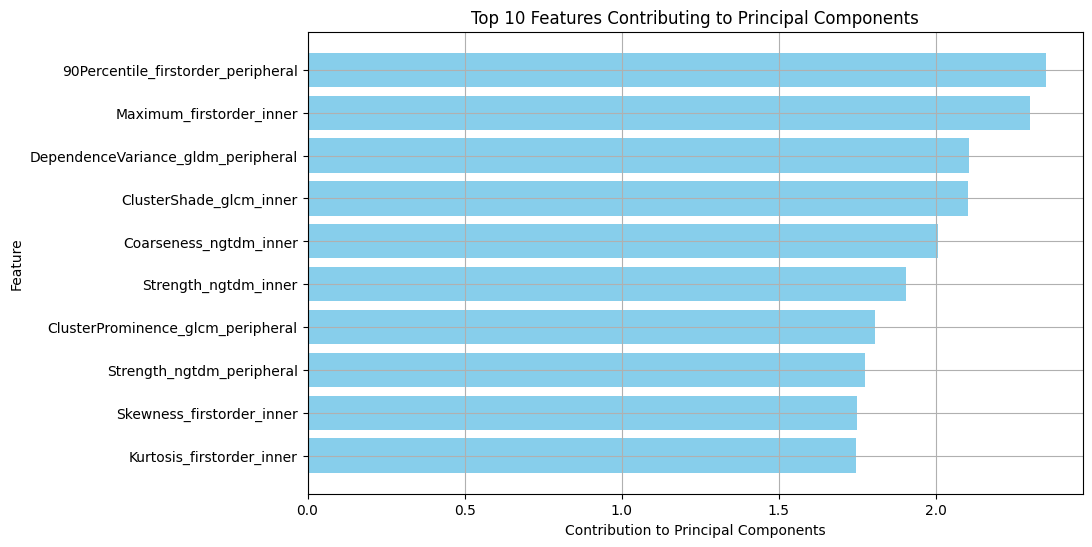

Feature Importance Analysis:
                                Feature  Importance
78   90Percentile_firstorder_peripheral    2.349796
6              Maximum_firstorder_inner    2.298549
103  DependenceVariance_gldm_peripheral    2.104693
55              ClusterShade_glcm_inner    2.103229
19               Coarseness_ngtdm_inner    2.007802
..                                  ...         ...
136   DifferenceAverage_glcm_peripheral    0.756663
139                  Id_glcm_peripheral    0.750337
48            RunPercentage_glrlm_inner    0.741364
140                 Idm_glcm_peripheral    0.733143
83        Maximum_firstorder_peripheral    0.000000

[154 rows x 2 columns]
Training and evaluating Random Forest model...
Training and evaluating Gradient Boosting model...
Training and evaluating SVM model...

Summary for Path Data dataset:
  Random Forest:
    - Final Validation Accuracy: 0.7083
    - Cross-Validation Mean: 0.7301
    - Cross-Validation CI: [0.6899, 0.7703]
  Gradient Boosting

/var/folders/8c/z2zrn3tn0152sgl_017y9g1r0000gn/T/ipykernel_33927/1852740656.py:172: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Final Validation Accuracy', data=results_df, palette="Set2")


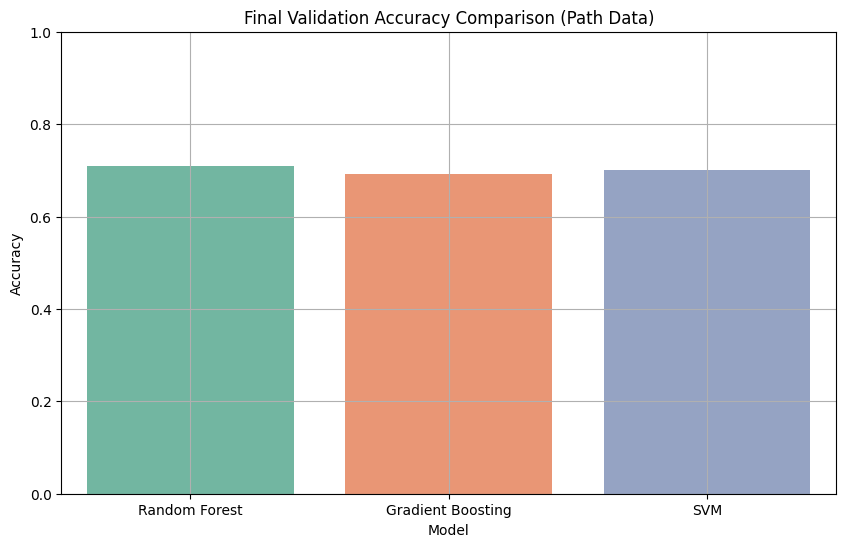

/var/folders/8c/z2zrn3tn0152sgl_017y9g1r0000gn/T/ipykernel_33927/1852740656.py:182: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Cross-Val Mean', data=results_df, palette="Set2")


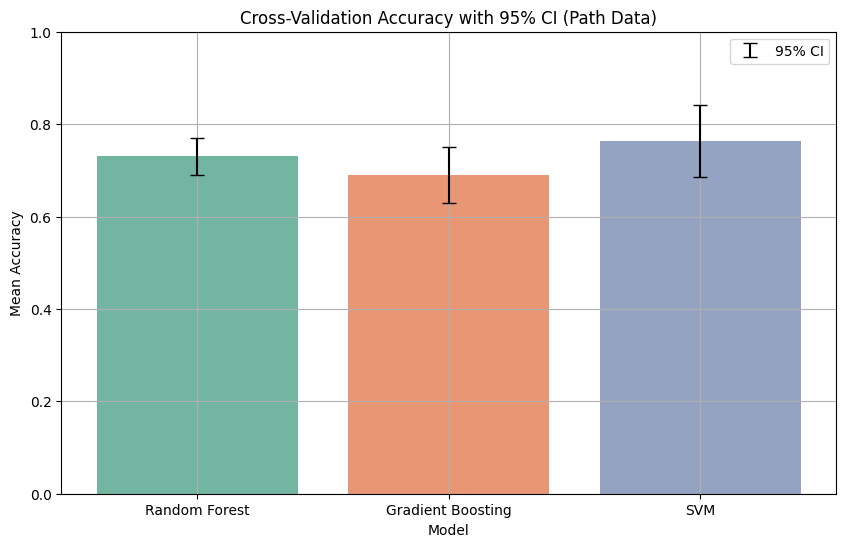

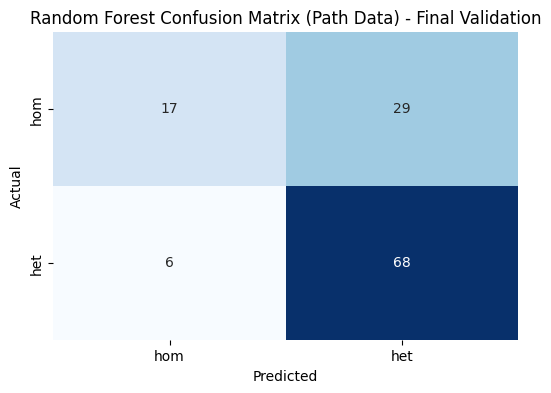

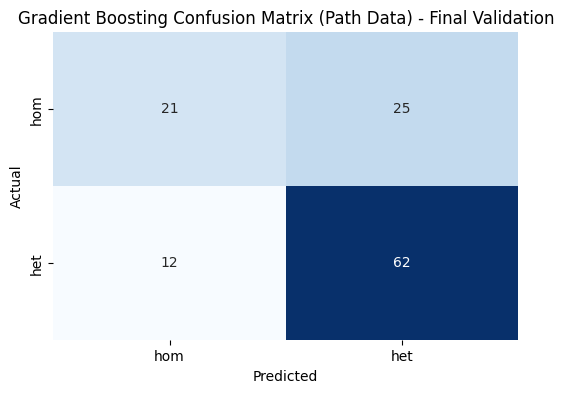

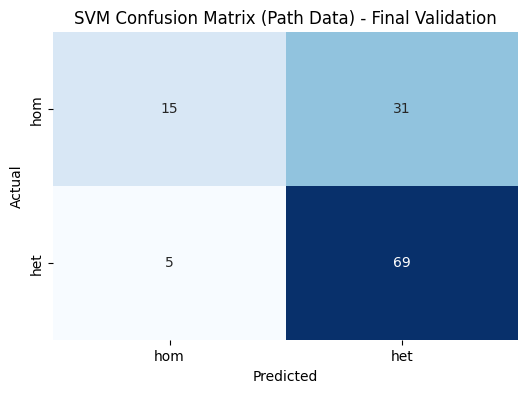

Processing file: mam_merge_updated.csv


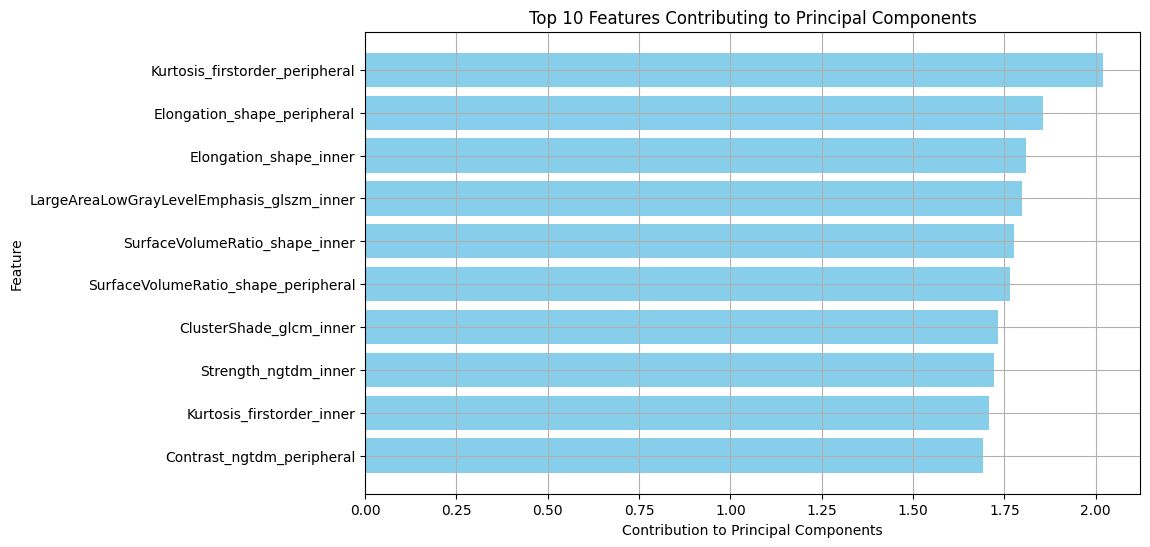

Feature Importance Analysis:
                                       Feature  Importance
112             Kurtosis_firstorder_peripheral    2.020416
200                Elongation_shape_peripheral    1.854924
93                      Elongation_shape_inner    1.810276
59   LargeAreaLowGrayLevelEmphasis_glszm_inner    1.798364
105             SurfaceVolumeRatio_shape_inner    1.776073
..                                         ...         ...
3                     Entropy_firstorder_inner    0.626443
95                 LeastAxisLength_shape_inner    0.000000
201                  Flatness_shape_peripheral    0.000000
202           LeastAxisLength_shape_peripheral    0.000000
94                        Flatness_shape_inner    0.000000

[214 rows x 2 columns]
Training and evaluating Random Forest model...
Training and evaluating Gradient Boosting model...
Training and evaluating SVM model...

Summary for MAM Data dataset:
  Random Forest:
    - Final Validation Accuracy: 0.6750
    - Cross-Vali

/var/folders/8c/z2zrn3tn0152sgl_017y9g1r0000gn/T/ipykernel_33927/1852740656.py:172: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Final Validation Accuracy', data=results_df, palette="Set2")


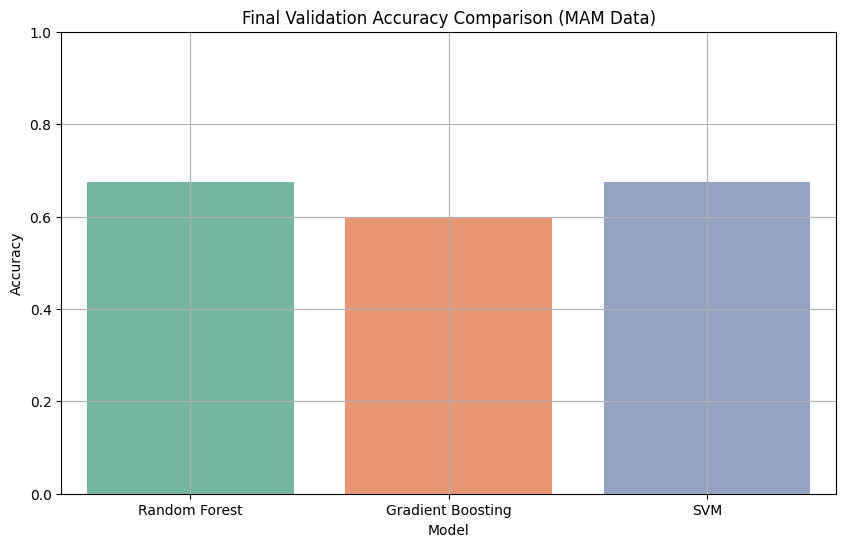

/var/folders/8c/z2zrn3tn0152sgl_017y9g1r0000gn/T/ipykernel_33927/1852740656.py:182: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Cross-Val Mean', data=results_df, palette="Set2")


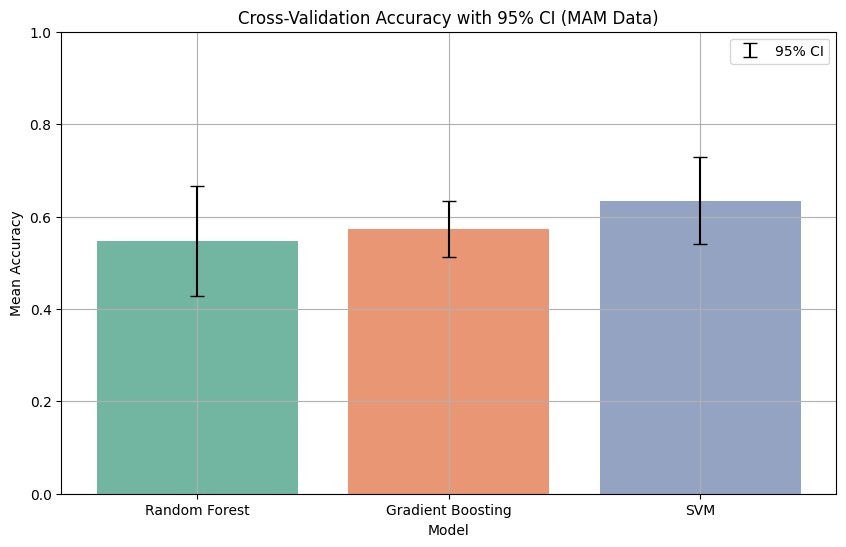

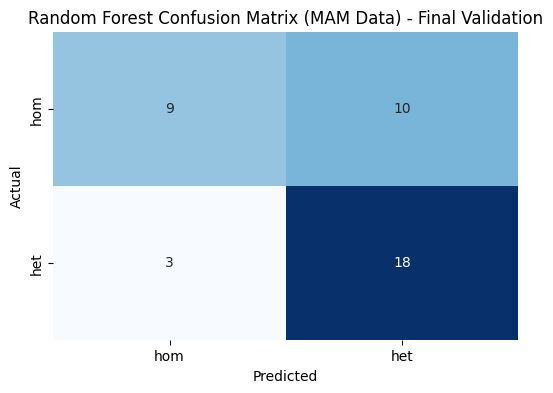

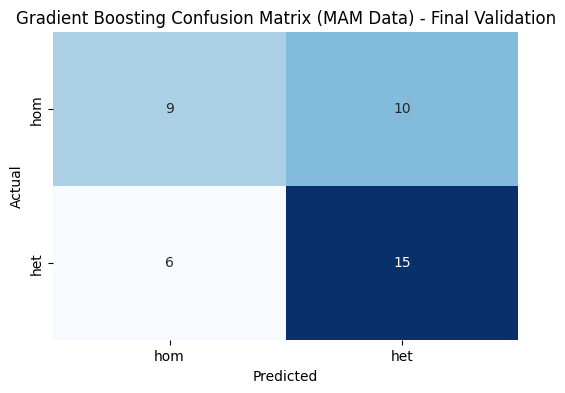

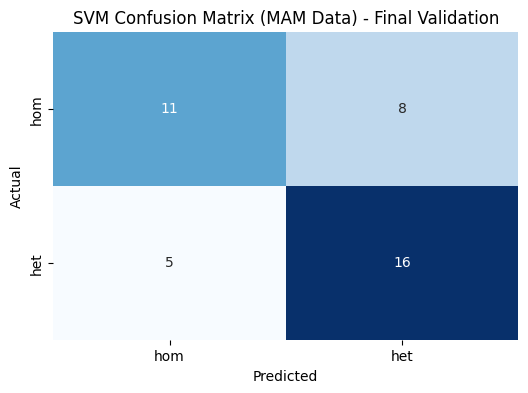

In [2]:
# Data manipulation and processing
import pandas as pd
import numpy as np

# Machine learning models and utilities
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score

# Statistical calculations
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns


def calculate_ci(scores, confidence=0.95):
    mean = np.mean(scores)
    sem = scipy.stats.sem(scores)  # Standard error of the mean
    ci = scipy.stats.t.interval(confidence, len(scores)-1, loc=mean, scale=sem)
    return mean, ci


def analyze_pca_feature_importance(pca, feature_names, top_n=10):
    """
    Analyze and plot the feature contributions to the principal components.

    Parameters:
        pca (PCA): Fitted PCA object.
        feature_names (list): List of original feature names.
        top_n (int): Number of top features to display.

    Returns:
        DataFrame: Feature contributions sorted by importance.
    """
    # Get PCA components (loadings)
    loadings = pca.components_

    # Compute the total contribution of each feature
    feature_contributions = np.sum(np.abs(loadings), axis=0)

    # Create a DataFrame for visualization
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_contributions
    })
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Plot top N features
    plt.figure(figsize=(10, 6))
    top_features = feature_importance_df.head(top_n)
    plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
    plt.xlabel('Contribution to Principal Components')
    plt.ylabel('Feature')
    plt.title(f'Top {top_n} Features Contributing to Principal Components')
    plt.gca().invert_yaxis()  # Invert y-axis for readability
    plt.grid(True)
    plt.show()

    return feature_importance_df


# Function to process and evaluate the dataset using a hybrid CV method
def process_and_evaluate_hybrid_cv(file_path, dataset_name, target_column='ihc_het'):
    print(f"Processing file: {file_path}")
    
    # Load the dataset
    data = pd.read_csv(file_path)

    # Drop the 'Unnamed: 0' and 'patient' columns if they exist
    data = data.drop(columns=['Unnamed: 0', 'patient'], errors='ignore')

    # Filter the target column for only 'hom' and 'het'
    data = data[data[target_column].isin(['hom', 'het'])]

    # Separate numeric columns for features and target
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    X = data[numeric_cols].drop(columns=[target_column], errors='ignore')
    y = data[target_column]

    # Impute missing values for numeric columns
    imputer = SimpleImputer(strategy='mean')
    X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_imputed)

    # Apply PCA to reduce dimensionality (optional)
    pca = PCA(n_components=20)
    X_pca = pca.fit_transform(X_scaled)

    # Feature importance analysis
    feature_importance_df = analyze_pca_feature_importance(pca, X_imputed.columns, top_n=10)
    print("Feature Importance Analysis:")
    print(feature_importance_df)

    # Split data into training + final validation set
    X_train_all, X_final_val, y_train_all, y_final_val = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

    # Define KFold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # Models: Random Forest, Gradient Boosting, SVM
    models = {
        "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42),
        "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42),
        "SVM": SVC(kernel='rbf', probability=True, random_state=42)
    }

    # Evaluate and store results
    results = {"Model": [], "Cross-Val Mean": [], "Cross-Val CI Lower": [], "Cross-Val CI Upper": [], "Final Validation Accuracy": []}
    confusion_matrices = {}

    best_model = None
    best_accuracy = 0

    for name, model in models.items():
        print(f"Training and evaluating {name} model...")

        # Cross-validation accuracy
        cross_val_scores = []
        for train_index, test_index in kf.split(X_train_all):
            X_train, X_test = X_train_all[train_index], X_train_all[test_index]
            y_train, y_test = y_train_all.iloc[train_index], y_train_all.iloc[test_index]

            model.fit(X_train, y_train)
            cross_val_scores.append(model.score(X_test, y_test))

        mean_score, (ci_lower, ci_upper) = calculate_ci(cross_val_scores)

        # Train on entire training set (excluding final validation)
        model.fit(X_train_all, y_train_all)

        # Predict on final validation set
        y_final_pred = model.predict(X_final_val)
        final_val_accuracy = accuracy_score(y_final_val, y_final_pred)

        # Track best performing model
        if final_val_accuracy > best_accuracy:
            best_accuracy = final_val_accuracy
            best_model = name
        
        # Store results
        results["Model"].append(name)
        results["Cross-Val Mean"].append(mean_score)
        results["Cross-Val CI Lower"].append(ci_lower)
        results["Cross-Val CI Upper"].append(ci_upper)
        results["Final Validation Accuracy"].append(final_val_accuracy)
        
        # Confusion matrix for final validation set
        confusion_matrices[name] = confusion_matrix(y_final_val, y_final_pred, labels=['hom', 'het'])

    # Convert results to DataFrame for easy visualization
    results_df = pd.DataFrame(results)

    # Print statistical summary
    print(f"\nSummary for {dataset_name} dataset:")
    for i, row in results_df.iterrows():
        print(f"  {row['Model']}:")
        print(f"    - Final Validation Accuracy: {row['Final Validation Accuracy']:.4f}")
        print(f"    - Cross-Validation Mean: {row['Cross-Val Mean']:.4f}")
        print(f"    - Cross-Validation CI: [{row['Cross-Val CI Lower']:.4f}, {row['Cross-Val CI Upper']:.4f}]")
    
    print(f"\nBest performing model for {dataset_name} is {best_model} with a final validation accuracy of {best_accuracy:.4f}\n")

    # Plot final validation accuracies
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Model', y='Final Validation Accuracy', data=results_df, palette="Set2")
    plt.title(f'Final Validation Accuracy Comparison ({dataset_name})')
    plt.ylabel('Accuracy')
    plt.xlabel('Model')
    plt.ylim(0, 1)
    plt.grid(True)
    plt.show()

    # Plot cross-validation scores with confidence intervals
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Model', y='Cross-Val Mean', data=results_df, palette="Set2")
    for i, row in results_df.iterrows():
        plt.errorbar(i, row['Cross-Val Mean'], 
                     yerr=[[row['Cross-Val Mean'] - row['Cross-Val CI Lower']], 
                           [row['Cross-Val CI Upper'] - row['Cross-Val Mean']]], 
                     fmt='none', capsize=5, color='black', label='95% CI' if i == 0 else "")
    plt.title(f'Cross-Validation Accuracy with 95% CI ({dataset_name})')
    plt.ylabel('Mean Accuracy')
    plt.xlabel('Model')
    plt.ylim(0, 1)
    plt.grid(True)
    plt.legend()
    plt.show()

    # Plot confusion matrices for final validation
    for model_name, cm in confusion_matrices.items():
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['hom', 'het'], yticklabels=['hom', 'het'])
        plt.title(f'{model_name} Confusion Matrix ({dataset_name}) - Final Validation')
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.show()


# File paths and dataset names
path_file = 'path_merge_updated.csv'
mam_file = 'mam_merge_updated.csv'

# Process and evaluate both files using hybrid CV
process_and_evaluate_hybrid_cv(path_file, "Path Data")
process_and_evaluate_hybrid_cv(mam_file, "MAM Data")
